# Part 1: Problem Setup

In [1]:
import pandas as pd

In [2]:
# Load the Excel file for project planning
project_plan_path = "/Users/spud/Documents/MSDS 460/Lok-MSDS-460-Assignment-2/Lok-MSDS-460-Assignment-2/project-plan-v003.xlsx"

# Read the Excel file
xls = pd.ExcelFile(project_plan_path)

# Display sheet names to determine relevant data
xls.sheet_names


['Sheet1']

In [3]:
# Load the data from the first sheet
df_tasks = pd.read_excel(xls, sheet_name="Sheet1")

# Show column names for reference
df_tasks.head(), df_tasks.columns


(  taskID                        task predecessorTaskIDs  bestCaseHours  \
 0      A            Describe product                NaN            NaN   
 1      B  Develop marketing strategy                NaN            NaN   
 2      C             Design brochure                  A            NaN   
 3      D  Develop product  prototype                NaN            NaN   
 4     D1       Requirements analysis                  A            NaN   
 
    expectedHours  worstCaseHours  projectManager  frontendDeveloper  \
 0            NaN             NaN             NaN                NaN   
 1            NaN             NaN             NaN                NaN   
 2            NaN             NaN             NaN                NaN   
 3            NaN             NaN             NaN                NaN   
 4            NaN             NaN             NaN                NaN   
 
    backendDeveloper  dataScientist  dataEngineer  
 0               NaN            NaN           NaN  
 1        

In [4]:
print(df_tasks.columns.tolist())


['taskID', 'task', 'predecessorTaskIDs', 'bestCaseHours', 'expectedHours', 'worstCaseHours', 'projectManager', 'frontendDeveloper', 'backendDeveloper', 'dataScientist', 'dataEngineer']


In [5]:
# Fill missing values in the time estimation columns with 0 for now
df_tasks[['bestCaseHours', 'expectedHours', 'worstCaseHours']] = df_tasks[['bestCaseHours', 'expectedHours', 'worstCaseHours']].fillna(0)

# Display summary statistics
df_tasks[['bestCaseHours', 'expectedHours', 'worstCaseHours']].describe()


,bestCaseHours,expectedHours,worstCaseHours
count,16.0,16.0,16.0
mean,0.0,0.0,0.0
std,0.0,0.0,0.0
min,0.0,0.0,0.0
25%,0.0,0.0,0.0
50%,0.0,0.0,0.0
75%,0.0,0.0,0.0
max,0.0,0.0,0.0


In [8]:
# Reassign reasonable industry-standard estimates (in hours) for each task
time_estimates = {
    "A": (8, 12, 16),    # Describe product
    "B": (12, 16, 24),   # Develop marketing strategy
    "C": (16, 24, 32),   # Design brochure
    "D": (160, 200, 240),# Develop product prototype (overall)
    "D1": (24, 32, 40),  # Requirements analysis
    "D2": (40, 50, 60),  # Database design
    "D3": (40, 50, 60),  # API development
    "D4": (40, 50, 60),  # Backend development
    "D5": (40, 50, 60),  # Frontend development
    "D6": (24, 32, 40),  # Testing and QA
    "D7": (24, 32, 40),  # Deployment setup
    "D8": (16, 24, 32),  # Documentation
    "E": (16, 24, 32),   # Develop user training material
    "F": (24, 32, 40),   # Conduct training sessions
    "G": (8, 12, 16),    # Gather user feedback
    "H": (16, 24, 32)    # Finalize and deploy
}

# Update the dataframe with the new estimates
for task_id, (best, expected, worst) in time_estimates.items():
    df_tasks.loc[df_tasks["taskID"] == task_id, ["bestCaseHours", "expectedHours", "worstCaseHours"]] = best, expected, worst

df_tasks.head()

,taskID,task,predecessorTaskIDs,bestCaseHours,expectedHours,worstCaseHours,projectManager,frontendDeveloper,backendDeveloper,dataScientist,dataEngineer
0,A,Describe product,NaN,8.0,12.0,16.0,NaN,NaN,NaN,NaN,NaN
1,B,Develop marketing strategy,NaN,12.0,16.0,24.0,NaN,NaN,NaN,NaN,NaN
2,C,Design brochure,A,16.0,24.0,32.0,NaN,NaN,NaN,NaN,NaN
3,D,Develop product prototype,NaN,160.0,200.0,240.0,NaN,NaN,NaN,NaN,NaN
4,D1,Requirements analysis,A,24.0,32.0,40.0,NaN,NaN,NaN,NaN,NaN


In [9]:
print("\nDEBUG: Industry-Standard Estimated Hours for Each Task")
for task, (best, expected, worst) in time_estimates.items():
    print(f"{task}: Best={best}, Expected={expected}, Worst={worst}")




DEBUG: Industry-Standard Estimated Hours for Each Task
A: Best=8, Expected=12, Worst=16
B: Best=12, Expected=16, Worst=24
C: Best=16, Expected=24, Worst=32
D: Best=160, Expected=200, Worst=240
D1: Best=24, Expected=32, Worst=40
D2: Best=40, Expected=50, Worst=60
D3: Best=40, Expected=50, Worst=60
D4: Best=40, Expected=50, Worst=60
D5: Best=40, Expected=50, Worst=60
D6: Best=24, Expected=32, Worst=40
D7: Best=24, Expected=32, Worst=40
D8: Best=16, Expected=24, Worst=32
E: Best=16, Expected=24, Worst=32
F: Best=24, Expected=32, Worst=40
G: Best=8, Expected=12, Worst=16
H: Best=16, Expected=24, Worst=32


Task Dependency Graph

In [26]:
import networkx as nx
import matplotlib.pyplot as plt

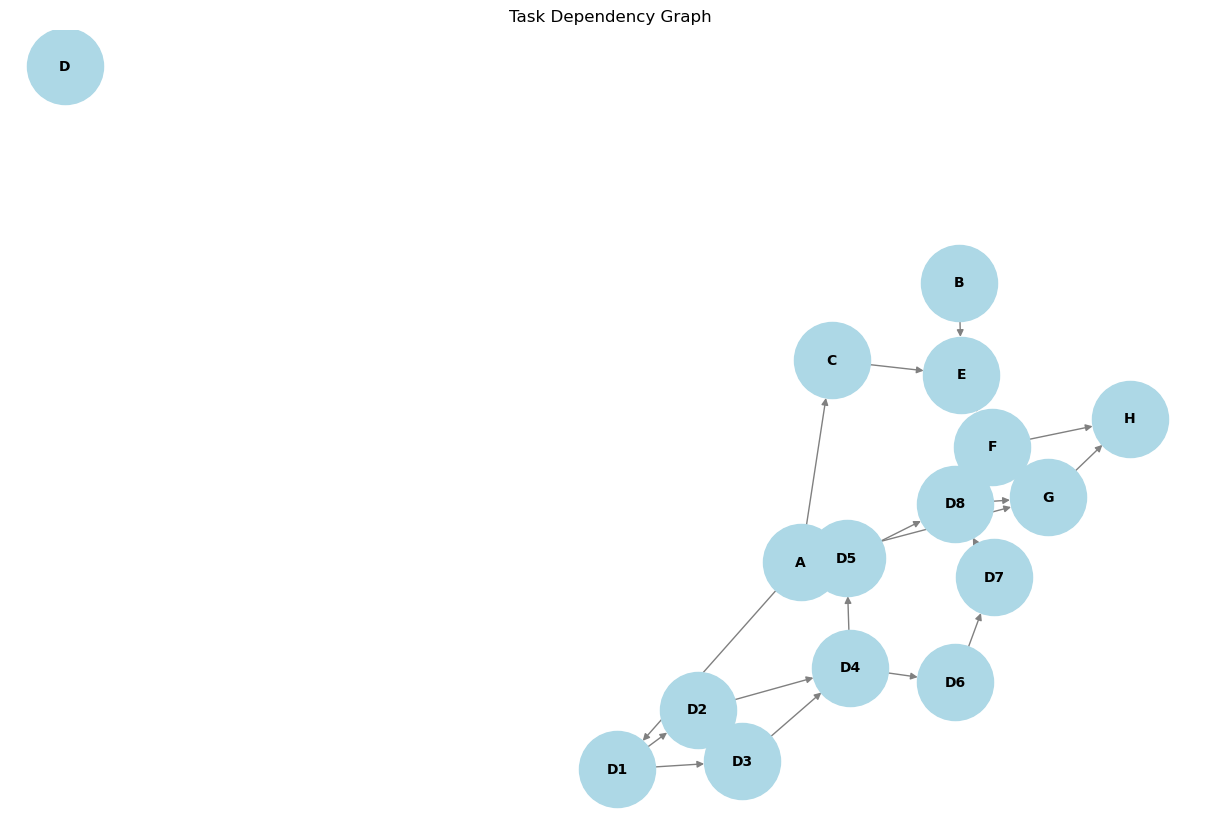

In [27]:
# Create a directed graph
G = nx.DiGraph()

# Add nodes (tasks)
for _, row in df_tasks.iterrows():
    G.add_node(row['taskID'], label=row['task'])

# Add edges (dependencies)
for _, row in df_tasks.iterrows():
    if pd.notna(row['predecessorTaskIDs']):  # If there are dependencies
        predecessors = str(row['predecessorTaskIDs']).split(',')
        for pred in predecessors:
            pred = pred.strip()
            if pred in G.nodes:
                G.add_edge(pred, row['taskID'])
# Plot the dependency graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)  # Position nodes for visualization
nx.draw(G, pos, with_labels=True, node_size=3000, node_color="lightblue", edge_color="gray", font_size=10, font_weight="bold", arrows=True)
plt.title("Task Dependency Graph")
plt.show()

In [28]:
# Identify tasks with no predecessors (can be started immediately)
independent_tasks = df_tasks[df_tasks["predecessorTaskIDs"].isna()]["taskID"].tolist()

# Identify tasks that depend on only one other task (can start soon after a single dependency is completed)
single_dependency_tasks = df_tasks[df_tasks["predecessorTaskIDs"].str.count(",").fillna(0) == 0]["taskID"].tolist()

# Display results
parallel_tasks = {
    "Independent Tasks (Start Immediately)": independent_tasks,
    "Single Dependency Tasks (Can Start Soon)": single_dependency_tasks,
}

parallel_tasks

{'Independent Tasks (Start Immediately)': ['A', 'B', 'D'],
 'Single Dependency Tasks (Can Start Soon)': ['A',
  'B',
  'C',
  'D',
  'D1',
  'D2',
  'D3',
  'D5',
  'D6',
  'D7']}

# Part 2: Model Specification

In [29]:
from pulp import LpMinimize, LpProblem, LpVariable

# Create the LP problem
lp_model = LpProblem("Project_Scheduling_Optimization", LpMinimize)

# Define decision variables (start times for each task)
task_vars = {task: LpVariable(f"T_{task}", lowBound=0) for task in df_tasks["taskID"]}

# Define the project completion time variable
T_end = LpVariable("T_end", lowBound=0)

# Set the objective function: Minimize project completion time
lp_model += T_end

# Add constraints for dependencies: A task can't start before its predecessor finishes
for _, row in df_tasks.iterrows():
    task = row["taskID"]
    duration = row["expectedHours"]

    if pd.notna(row["predecessorTaskIDs"]):  # Check if dependencies exist
        predecessors = str(row["predecessorTaskIDs"]).split(",")
        for pred in predecessors:
            pred = pred.strip()
            if pred in task_vars:  # Ensure valid task ID
                lp_model += task_vars[pred] + duration <= task_vars[task]

# Ensure T_end is greater than all task completion times
for task, var in task_vars.items():
    duration = df_tasks.loc[df_tasks["taskID"] == task, "expectedHours"].values[0]
    lp_model += var + duration <= T_end

# Solve the LP problem
from pulp import PULP_CBC_CMD
lp_model.solve(PULP_CBC_CMD(msg=False))

# Print results
print("Project Scheduling Optimization Results:")
print(f"Minimum Project Completion Time: {T_end.varValue} hours\n")

print("Task Start Times:")
for task, var in task_vars.items():
    print(f"{task}: Start at {var.varValue} hours")


Project Scheduling Optimization Results:
Minimum Project Completion Time: 300.0 hours

Task Start Times:
A: Start at 0.0 hours
B: Start at 0.0 hours
C: Start at 24.0 hours
D: Start at 0.0 hours
D1: Start at 32.0 hours
D2: Start at 82.0 hours
D3: Start at 82.0 hours
D4: Start at 132.0 hours
D5: Start at 182.0 hours
D6: Start at 164.0 hours
D7: Start at 196.0 hours
D8: Start at 220.0 hours
E: Start at 48.0 hours
F: Start at 252.0 hours
G: Start at 232.0 hours
H: Start at 276.0 hours


In [30]:
# Calculate slack for Task H
h_slack = task_vars["H"].varValue - max(task_end_times["F"], task_end_times["G"])
print(f"\nDEBUG: Task H Slack = {h_slack} hours")




DEBUG: Task H Slack = -8.0 hours


In [31]:
lp_model += task_vars["H"] == task_end_times["F"]


In [34]:
# Identify all tasks that contribute to T_end
critical_path = set()

def trace_full_critical_path(task):
    """Recursively add tasks to the critical path by following dependencies back to the beginning."""
    if task in critical_path:
        return  # Prevent infinite loops

    critical_path.add(task)

    # Get predecessors
    predecessors = df_tasks.loc[df_tasks["taskID"] == task, "predecessorTaskIDs"].values[0]
    if pd.notna(predecessors):
        for pred in str(predecessors).split(","):
            pred = pred.strip()
            if pred in task_end_times:
                trace_full_critical_path(pred)  # Recursively trace predecessors

# Start tracing back from all tasks that finish at T_end
for task, end_time in task_end_times.items():
    if abs(end_time - T_end.varValue) <= 2:
        trace_full_critical_path(task)

# Sort tasks by start time for proper order
critical_path = sorted(set(critical_path), key=lambda x: task_vars[x].varValue)

print("\nCritical Path Tasks:")
print(" → ".join(critical_path))



Critical Path Tasks:
A → B → C → D1 → E → D3 → D2 → D4 → D6 → D5 → D7 → D8 → G → F → H


In [35]:
lp_model

Project_Scheduling_Optimization:
MINIMIZE
1*T_end + 0
SUBJECT TO
_C1: T_A - T_C <= -24

_C2: T_A - T_D1 <= -32

_C3: T_D1 - T_D2 <= -50

_C4: T_D1 - T_D3 <= -50

_C5: T_D2 - T_D4 <= -50

_C6: T_D3 - T_D4 <= -50

_C7: T_D4 - T_D5 <= -50

_C8: T_D4 - T_D6 <= -32

_C9: T_D6 - T_D7 <= -32

_C10: T_D5 - T_D8 <= -24

_C11: T_D7 - T_D8 <= -24

_C12: T_B - T_E <= -24

_C13: T_C - T_E <= -24

_C14: T_D8 - T_F <= -32

_C15: T_E - T_F <= -32

_C16: T_A - T_G <= -12

_C17: T_D8 - T_G <= -12

_C18: T_F - T_H <= -24

_C19: T_G - T_H <= -24

_C20: T_A - T_end <= -12

_C21: T_B - T_end <= -16

_C22: T_C - T_end <= -24

_C23: T_D - T_end <= -200

_C24: T_D1 - T_end <= -32

_C25: T_D2 - T_end <= -50

_C26: T_D3 - T_end <= -50

_C27: T_D4 - T_end <= -50

_C28: T_D5 - T_end <= -50

_C29: T_D6 - T_end <= -32

_C30: T_D7 - T_end <= -32

_C31: T_D8 - T_end <= -24

_C32: T_E - T_end <= -24

_C33: T_F - T_end <= -32

_C34: T_G - T_end <= -12

_C35: T_H - T_end <= -24

_C36: T_H = 284

VARIABLES
T_A Continuous


1